Copyright (c) Microsoft Corporation. All rights reserved. Licensed under the MIT License.

# Command and Control interface
This notebooks shows how to interact with the command&control server to observe the environment and initiate actions on the nodes where the attacker client is installed.

In [16]:
import networkx as nx
from tabulate import tabulate
import cyberbattle.simulation.model as model
import cyberbattle.simulation.actions as actions
import cyberbattle.simulation.commandcontrol as commandcontrol
import importlib
importlib.reload(model)
importlib.reload(actions)
importlib.reload(commandcontrol)
import plotly.offline as plo
plo.init_notebook_mode(connected=True)

We first create a simulation environment from a randomly generated network graph.

In [17]:
g = nx.erdos_renyi_graph(35,0.05,directed=True)
g = model.assign_random_labels(g)
env = model.Environment(network=g, vulnerability_library=dict([]), identifiers=model.SAMPLE_IDENTIFIERS)


We create the `CommandControl` object used to the environment and execute actions, and plot the graph explored so far.


In [18]:
c = commandcontrol.CommandControl(env)

Nodes disovered so far: [{'id': '33', 'status': 'owned'}]


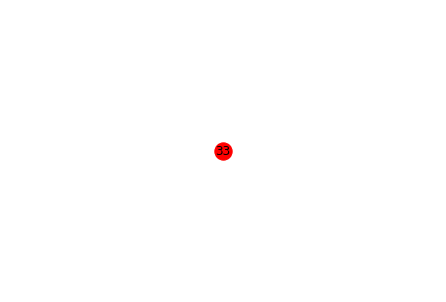

In [19]:
c.plot_nodes()
print("Nodes disovered so far: " + str(c.list_nodes()))
starting_node = c.list_nodes()[0]['id']

For debugging purpose it's also convient to view the internals of the environment via the `EnvironmentDebugging` object. For instance we can use it to plot the entire graph, including nodes that were not discovered yet by the attacker.

In [20]:
dbg = commandcontrol.EnvironmentDebugging(c)

Name: 
Type: DiGraph
Number of nodes: 35
Number of edges: 67
Average in degree:   1.9143
Average out degree:   1.9143


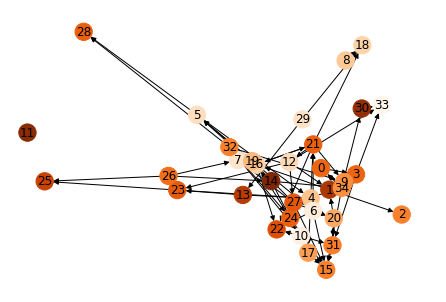

In [21]:
env.plot_environment_graph()
print(nx.info(env.network))

In [22]:
print(tabulate(c.list_all_attacks(),{}))

  id  status    properties    local_attacks    remote_attacks
----  --------  ------------  ---------------  ----------------
  33  owned     []            []               []


In [23]:
outcome = c.run_attack(starting_node, 'RecentlyAccessedMachines')
outcome

ValueError: Vulnerability 'RecentlyAccessedMachines' not supported by node='33'

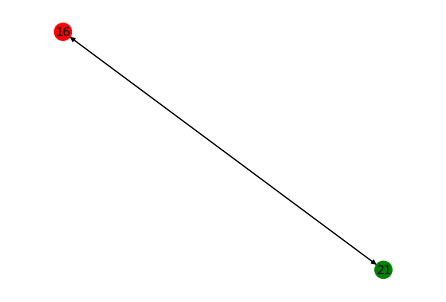

In [ ]:
c.plot_nodes()

In [ ]:
print(tabulate(c.list_nodes(),{}))

  id  status
----  ----------
  13  owned
   5  discovered


In [ ]:
print(tabulate(c.list_all_attacks(),{}))

  id  status      properties                                         local_attacks                 remote_attacks
----  ----------  -------------------------------------------------  ----------------------------  ----------------
  13  owned       ['Azure-VM', 'Win10', 'PortRDPOpen', 'HyperV-VM']  ['RecentlyAccessedMachines']  []
   5  discovered                                                                                   []
